# 08/06

In [3]:
import math
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# weights of cereal cartons
n = 1500
Xavg = 11.8 # ounces per carton
sigma = 0.75 # ounce

In [3]:
(2.58**2 * 0.75**2)/0.25**2

59.9076

In [4]:
# thus the federal agency must obtain a random sample of 60 cereal cartons to estimate weight within +-0.25

In [5]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

print(population_ages)

[58 55 53 ... 27 28 28]


In [6]:
np.random.seed(10)
sample_ages = np.random.choice(a=population_ages,size=1000)            # Sample 500 values
print(sample_ages)

[48 28 56 24 62 56 49 46 51 56 54 52 29 45 59 20 28 46 33 23 32 43 49 32
 51 26 58 44 31 24 48 30 57 48 26 34 30 27 57 44 64 27 30 28 59 45 41 30
 26 53 55 48 57 46 25 50 61 31 48 28 50 49 49 48 53 68 23 22 29 46 50 54
 44 58 27 69 42 27 24 51 29 64 48 28 49 52 54 54 25 52 55 54 31 59 28 24
 58 51 28 62 58 33 57 31 61 30 29 50 59 30 54 62 56 30 49 31 52 50 57 47
 45 28 51 27 29 64 53 49 40 26 30 52 27 51 32 30 29 30 32 29 53 54 52 58
 47 65 29 53 28 55 29 53 47 60 21 52 26 27 30 55 61 49 52 59 50 32 55 65
 57 32 55 53 59 52 62 31 30 26 29 45 25 29 54 29 26 50 28 57 28 53 58 34
 66 28 26 20 52 56 28 26 27 42 56 26 51 58 72 54 26 23 55 46 64 61 61 58
 25 55 28 27 56 62 27 59 54 52 29 58 30 55 29 27 40 57 48 26 29 22 26 27
 59 45 59 26 55 30 47 48 57 31 32 56 55 39 47 29 56 51 71 27 31 52 29 54
 59 26 51 51 48 59 53 51 48 53 26 49 48 29 49 50 56 27 28 26 57 53 32 55
 30 55 55 68 62 34 54 27 48 21 48 65 26 58 29 23 64 33 52 25 50 48 33 57
 37 55 27 63 27 50 26 27 27 31 44 51 30 50 29 23 54

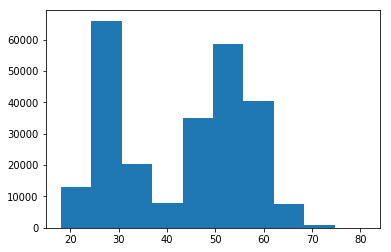

In [7]:
plt.hist(population_ages)
plt.show()

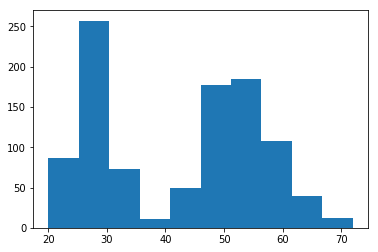

In [8]:
plt.hist(sample_ages)
plt.show()

In [9]:
print('Population Size =', population_ages.size)
print('Population Mean =', np.mean(population_ages))
print('Population Std =', np.std(population_ages))
print()
print('Sample Size =', sample_ages.size)
print('Sample Mean =', np.mean(sample_ages))
print('Sample Std =', np.std(sample_ages,ddof=1))

Population Size = 250000
Population Mean = 43.002372
Population Std = 13.229146547438953

Sample Size = 1000
Sample Mean = 42.523
Sample Std = 13.439273979091471


In [10]:
ci = 0.99
n = sample_ages.size
Xavg = np.mean(sample_ages)
sigma = np.std(sample_ages,ddof=1)
s = sigma/np.sqrt(n)
LCI, UCI = stats.norm.interval(ci, loc=Xavg, scale=s)
print('[%1.4f, %1.4f]' %(LCI, UCI))

[41.4283, 43.6177]


In [11]:
ci=0.95
LCI, UCI = stats.norm.interval(ci, loc=Xavg, scale=s)
print('[%1.4f, %1.4f]' %(LCI, UCI))

[41.6900, 43.3560]


In [12]:
ci=0.9
LCI, UCI = stats.norm.interval(ci, loc=Xavg, scale=s)
print('[%1.4f, %1.4f]' %(LCI, UCI))

[41.8240, 43.2220]


In [13]:
H           = [ 4.7, 9.2, 9.3, 11.2, 8, 7.6, 7.4, 4.9, 9.2, 5.3, 1.7, 2.8, 7.2, 12.3, 8.6, 10.6, 9, 5.7, 6.9, 3.8]
HoursSpent  = np.array(H)

In [14]:
ci = 0.9
sample_mean = HoursSpent.mean()
sigma = 3.1
n = HoursSpent.size
s = sigma / np.sqrt(n)
LCI, UCI = stats.norm.interval(ci, loc=sample_mean, scale=s)
print('%d%s CI for mean hours spent by students is %1.4f to %1.4f hours' % (ci*100, '%', LCI, UCI))

90% CI for mean hours spent by students is 6.1298 to 8.4102 hours


In [15]:
# CI width
UCI-LCI

2.280362804198356

In [16]:
stats.norm.isf(q=0.9, loc=sample_mean, scale=s)

6.38165271065901

In [17]:
pd.Series(H).quantile(0.9)

10.66

## Hypothesis Testing

### Left-tailed test

In [4]:
mu = 3 # hours
Xavg = 2.8 # hours
sd = 0.6
n = 50

Ha : mu < 3 hrs  [alternative hypothesis]  
H0 : mu >= 3 hrs  [null hypothesis]  
Assume H0 is True

In [5]:
ts = (Xavg - mu)/(sd/math.sqrt(n)) # test statistic
ts

-2.3570226039551607

In [20]:
pval = stats.norm.cdf(ts) # p value
pval

0.009211062727049439

- There is only 0.9% probability of H0 being true.
- Hence we can reject H0 with 99% confidence

### Right-tailed test

In [21]:
mu = 520 # bushels
Xavg = 573
sd = 124
n = 36

Ha : mu > 520 bushels  [alternative hypothesis]  
H0 : mu <= 520 bushels  [null hypothesis]  
Assume H0 is True

In [22]:
ts = (Xavg - mu)/(sd/math.sqrt(n))
ts

2.564516129032258

In [23]:
pval = 1 -stats.norm.cdf(ts) # p value
pval

0.00516598885994668

- Only 0.5% chance of H0 being true
- Hence we can reject H0 with more than 99% confidence

### Two-tailed test

In [24]:
mu = 190 # mg/dL (cholesterol level)
Xavg = 178.2
sd = 45.3
n = 100

Ha : mu != 190 mg/dL  [alternative hypothesis]  
H0 : mu = 190 mg/dL  [null hypothesis]  
Assume H0 is True

In [25]:
ts = (Xavg - mu)/(sd/math.sqrt(n))
ts

-2.6048565121412834

In [26]:
pval = 2 * stats.norm.cdf(ts) # p value
pval

0.009191274302693888

- p-val less than 0.05 means it will fall in the rejection region
- Hence we can reject H0 with 95% confidence

## One Sample Test

- *shapiro* [Test for Normality]
    - (if normal) then *ttest_1samp*
    - (if not normal) then *wilcoxon*

### ttest_1samp() - parametric

In [27]:
from scipy.stats import ttest_1samp

In [28]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

print(population_ages)

[58 55 53 ... 27 28 28]


In [29]:
np.random.seed(6)
sample_ages = np.random.choice(a= population_ages,size=500)            # Sample 500 values

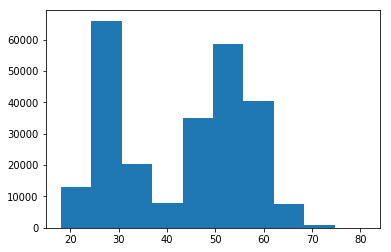

In [30]:
plt.hist(population_ages)
plt.show()

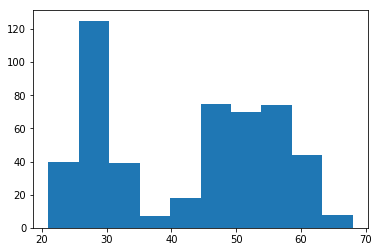

In [31]:
plt.hist(sample_ages)
plt.show()

In [32]:
print('Population Size =', population_ages.size)
print('Population Mean =', np.mean(population_ages))
print('Population Std =', np.std(population_ages))
print()
print('Sample Size =', sample_ages.size)
print('Sample Mean =', np.mean(sample_ages))
print('Sample Std =', np.std(sample_ages,ddof=1))

Population Size = 250000
Population Mean = 43.002372
Population Std = 13.229146547438953

Sample Size = 500
Sample Mean = 42.388
Sample Std = 13.050597388026677


In [33]:
tstat,pval = ttest_1samp(sample_ages, 43)
print(tstat)
print(pval)

-1.0485907744617016
0.29487410580753803


In [34]:
ttest_1samp(sample_ages, 50)

Ttest_1sampResult(statistic=-13.042276103271979, pvalue=1.1573786231156175e-33)

In [35]:
# getting 50 random values with mean=2.8 and sd=0.6
std = np.random.randn(50)
delivery_times = (std*0.6)+2.8
delivery_times
print('Mean =',np.mean(delivery_times))
print('Std =',np.std(delivery_times))

Mean = 2.7216661849706845
Std = 0.5451424818900117


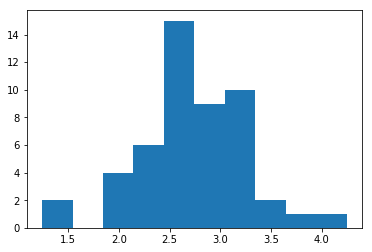

In [36]:
plt.hist(delivery_times)
plt.show()

In [37]:
ttest_1samp(delivery_times, 3)

Ttest_1sampResult(statistic=-3.5739953680555505, pvalue=0.0008013889001502078)

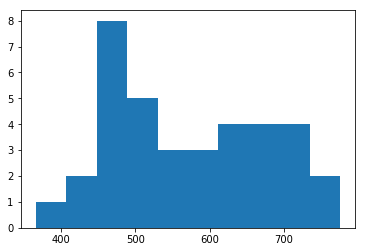

In [38]:
bushels = (np.random.randn(36)*124) + 573
plt.hist(bushels)
plt.show()

In [39]:
ttest_1samp(bushels,520)

Ttest_1sampResult(statistic=2.871629798834074, pvalue=0.00688955282624967)

### shapiro() - Test for Normality

In [40]:
from scipy.stats import shapiro

In [41]:
delivery_times

array([3.62983541, 3.61743334, 3.83473911, 2.82203619, 3.05574458,
       3.09064027, 3.18645966, 2.85440159, 2.48636685, 2.33807718,
       2.91854209, 2.51630358, 2.53186385, 2.2005531 , 2.53233753,
       2.18175138, 2.05245546, 2.30354421, 2.67562515, 2.81791026,
       2.9420488 , 2.81602125, 2.53150461, 3.25628   , 1.24167518,
       2.50544208, 2.44980133, 2.75191064, 2.11946081, 1.53414671,
       2.59543568, 2.58132716, 2.54535928, 3.15617562, 1.85768552,
       2.93800396, 2.65205434, 3.2216372 , 2.68032015, 2.22635832,
       3.0962509 , 2.14001914, 3.24340278, 3.26017025, 2.903341  ,
       2.43236221, 4.24699374, 2.46453607, 3.34103223, 2.70593149])

H0 : Data is normal  
Ha : Data is not normal

In [42]:
shapiro(delivery_times)

(0.9828587174415588, 0.6770855784416199)

- p-value 0.58 > 0.05 hence we failed to reject null hypothesis
- Data is normal

In [43]:
shapiro(bushels)

(0.9457728266716003, 0.0769900530576706)

- p-value 0.96 > 0.05 hence we failed to reject null hypothesis
- Data is normal

In [44]:
shapiro(sample_ages)

(0.9011534452438354, 1.8303998178361206e-17)

- p-value 1.84e-25 < 0.05 hence we reject null hypothesis
- Data is NOT normal

### wilcoxon() - non-parametric t-tests

- For data which is not normal, use wilcoxon() instead of ttest_1samp()
- Check shapiro() to determine normality of data, and then use ttest_1samp() or wilcoxon() accordingly

In [45]:
from scipy.stats import wilcoxon

In [46]:
ttest_1samp(sample_ages,43)

Ttest_1sampResult(statistic=-1.0485907744617016, pvalue=0.29487410580753803)

In [48]:
wilcoxon(sample_ages-43)

WilcoxonResult(statistic=54995.5, pvalue=0.03773950923136843)

## Two Sample Tests

- paired [dependent]
    - shapiro on both groups [test for normality]
    - (if both are normal) 
        - Levene [variance test]
        - (if variances are equal)
            - parametric test - ttest_1samp
        - (if not equal)
            - non-parametric test - wilcoxon
    - (if either are not normal)
        - Bartlett [variance test]
        - non-parametric test - wilcoxon
- unpaired [independent]